# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

output_data_file

'output_data/cities.csv'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# weather_url
units = "imperial" 


#get from doc &q
# query_url = f"(url+ appid =(weather_api_key)&units=(unit)&q="
# query_url

query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6d987dcb0699091a9eee0d01a310631b&units=imperial&q=


In [4]:

# city_response = requests.get(query_url + city)
# city_json = city_response.json()
# city_json = requests.get(query_url + "&q=" + city).json()

# city_json = city_response.json()
# print(city_json)

In [5]:
#lists to hold data needed for plots
city_name = []
lon = []
lat = []
temp = []
max_temp = []
humidity = []
clouds = []
wind = []

# set up retrieval of data from json
#i nclude a print log of each city as it'sbeing processed (with the city number and city name).
 
city_number = 1

for city in cities:
    
    final_url = query_url + city
#         
    response = requests.get(final_url).json()
                            
    try: 
        
# #       
        city_name.append(response['name'])     
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        print(f" Processing... {city_number} | {city}")        
        city_number = city_number + 1
                            
    except:
        
# #         print(f" Processing... {city_number} | {city}")
         print(f" Incomplete Info ... Next Record.")
         city_number += 1 

#         print(response)

 Processing... 1 | punta arenas
 Processing... 2 | geraldton
 Processing... 3 | busselton
 Processing... 4 | avarua
 Incomplete Info ... Next Record.
 Processing... 6 | kodiak
 Incomplete Info ... Next Record.
 Processing... 8 | ukiah
 Processing... 9 | rikitea
 Processing... 10 | ifo
 Processing... 11 | berlevag
 Processing... 12 | saint-joseph
 Processing... 13 | port alfred
 Processing... 14 | sonoita
 Processing... 15 | lasa
 Processing... 16 | upernavik
 Processing... 17 | kijang
 Processing... 18 | cidreira
 Processing... 19 | mataura
 Processing... 20 | kazachka
 Processing... 21 | hermanus
 Processing... 22 | tougan
 Processing... 23 | celestun
 Processing... 24 | albany
 Processing... 25 | jamestown
 Processing... 26 | peniche
 Processing... 27 | frutigen
 Processing... 28 | ostrovnoy
 Processing... 29 | gat
 Processing... 30 | katsuura
 Processing... 31 | bandar-e lengeh
 Processing... 32 | leh
 Incomplete Info ... Next Record.
 Processing... 34 | kuah
 Processing... 35 | cap

 Processing... 273 | yulara
 Processing... 274 | plettenberg bay
 Processing... 275 | kaitangata
 Incomplete Info ... Next Record.
 Processing... 277 | amargosa
 Processing... 278 | corowa
 Processing... 279 | tairua
 Processing... 280 | lata
 Processing... 281 | moroni
 Processing... 282 | gamba
 Processing... 283 | vardo
 Processing... 284 | cocal
 Processing... 285 | otjiwarongo
 Processing... 286 | tomatlan
 Processing... 287 | bulolo
 Processing... 288 | laguna
 Processing... 289 | cap malheureux
 Processing... 290 | gorom-gorom
 Processing... 291 | milazzo
 Processing... 292 | vallenar
 Processing... 293 | darab
 Processing... 294 | vao
 Processing... 295 | mogadishu
 Processing... 296 | harnosand
 Processing... 297 | ngunguru
 Processing... 298 | argir
 Processing... 299 | bilibino
 Processing... 300 | stornoway
 Processing... 301 | termiz
 Processing... 302 | sitka
 Processing... 303 | nanortalik
 Processing... 304 | hay river
 Processing... 305 | phibun mangsahan
 Processing..

 Processing... 543 | sorochinsk
 Processing... 544 | healdsburg
 Processing... 545 | haines junction
 Processing... 546 | najran
 Processing... 547 | amapa
 Processing... 548 | heinola
 Processing... 549 | tangping
 Processing... 550 | capilla de guadalupe
 Processing... 551 | houston
 Processing... 552 | guilin
 Processing... 553 | mildura
 Processing... 554 | batticaloa
 Processing... 555 | portland
 Processing... 556 | dan khun thot
 Processing... 557 | kahului
 Processing... 558 | biak
 Processing... 559 | caibarien
 Processing... 560 | hailey
 Processing... 561 | mogapinyana
 Processing... 562 | concepcion del oro
 Processing... 563 | sri aman
 Processing... 564 | catabola
 Processing... 565 | esperance
 Processing... 566 | barahona
 Processing... 567 | zhucheng
 Processing... 568 | cockburn town
 Processing... 569 | lillehammer
 Processing... 570 | beringovskiy
 Processing... 571 | altamont
 Processing... 572 | matara
 Processing... 573 | buin
 Processing... 574 | shalya
 Process

In [6]:
# print(city_name)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df = pd.DataFrame({
                                "City": city_name,
                                "Latitude": lat,
                                "Longitude": lon,
                                "Temperature": temp,
                                "Max Temperature": max_temp,
                                "Humidity": humidity,
                                "Clouds": clouds,
                                "Wind": wind
                                
                                })

# city_weather_df

city_weather_df.to_csv("city_weather.csv")
city_weather_df.head(20)

,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind
0,Punta Arenas,-53.1500,-70.9167,37.51,37.51,60,40,16.11
1,Geraldton,-28.7667,114.6000,59.41,59.41,63,75,17.27
2,Busselton,-33.6500,115.3333,50.04,50.04,64,83,23.62
3,Avarua,-21.2078,-159.7750,73.45,73.45,88,20,3.44
4,Saint Paul Harbor,57.7900,-152.4072,51.85,51.85,96,100,7.00
5,Ukiah,39.1502,-123.2078,65.93,72.88,55,1,0.00
6,Rikitea,-23.1203,-134.9692,71.55,71.55,72,98,17.11
7,Ifo,6.8144,3.1958,76.62,76.62,79,81,6.29
8,Berlevåg,70.8578,29.0864,66.15,67.80,59,0,6.91
9,Saint-Joseph,-21.3667,55.6167,73.26,75.56,75,17,4.76


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_over_hundred = city_weather_df.loc[city_weather_df["Humidity"]>100]
humidity_over_hundred

,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind


In [10]:
#  Get the indices of cities that have humidity over 100%.
# Null   skip step 


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

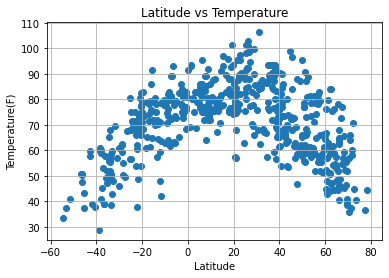

In [11]:
#Activity 2-5

plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature"])

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Temp.png")

plt.show()

In [12]:
# This plot shows that the higher temperatures are grouped near -10 to 40 degrees from the Equator (Latitude = 0 degrees).
# Whereas the cooler temperatures occur further away from the Equator.  

## Latitude vs. Humidity Plot

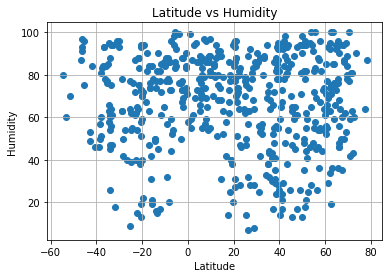

In [13]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Humidity.png")

plt.show()

In [14]:
# Although the range of humidity(%) seems to be evenly distributed throughout both hemispheres, the northern latitudes
# have more occurences of high humidity. 

## Latitude vs. Cloudiness Plot

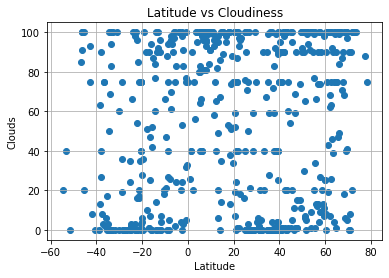

In [15]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Clouds"])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Clouds")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Cloudiness.png")

plt.show()

In [16]:
# The highest frequency of cloudiness occurs in the northern hemisphere. 

## Latitude vs. Wind Speed Plot

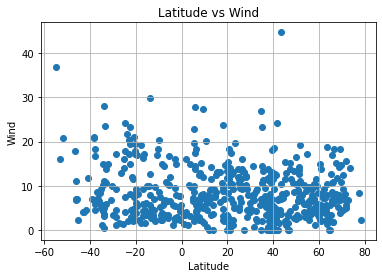

In [17]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind"])

plt.title("Latitude vs Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Wind Speed.png")

plt.show()

In [18]:
# Wind speeds are similar across the middle latitudes while the extreme regions +- 75 degrees latitude, except
# for a few instances, seem to have low occurrences of high winds. 

## Linear Regression

In [19]:
# activity 2-7

# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)



<function matplotlib.pyplot.show(*args, **kw)>

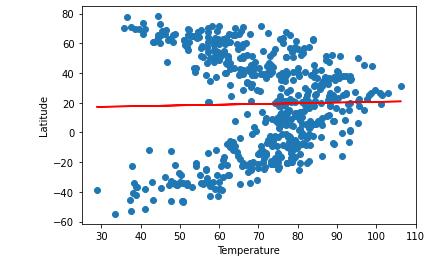

In [20]:
#matplotlib 3-8 and 3-9

x_values = city_weather_df["Temperature"]
y_values = city_weather_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

In [23]:
#Split DF into Northern and Southern Hemi

north_hemi = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
south_hemi = city_weather_df.loc[city_weather_df["Latitude"] < 0]

# south_hemi.head()
# north_hemi.head()

,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind
0,Punta Arenas,-53.1500,-70.9167,37.51,37.51,60,40,16.11
1,Geraldton,-28.7667,114.6000,59.41,59.41,63,75,17.27
2,Busselton,-33.6500,115.3333,50.04,50.04,64,83,23.62
3,Avarua,-21.2078,-159.7750,73.45,73.45,88,20,3.44
6,Rikitea,-23.1203,-134.9692,71.55,71.55,72,98,17.11


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

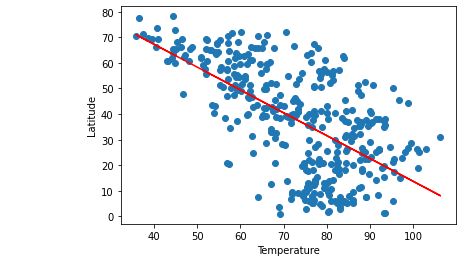

In [24]:
x_values = north_hemi["Temperature"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

In [ ]:
# The temperatures increase as latitude aproaches the equator (lat 0) and decreases as the latitude
# approaches the North Pole (lat 90) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = south_hemi["Temperature"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_hemi["Temperature"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_hemi["Temperature"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_hemi["Temperature"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_hemi["Temperature"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north_hemi["Temperature"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south_hemi["Temperature"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show